# 微信群期限测试 

In [8]:
# -*- coding: cp936 -*-
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import Counter

import jieba,os,codecs,re
import jieba.analyse
import json,csv,re,time,datetime
from pymongo import MongoClient
#from wordcloud import WordCloud

import arrow #datatime的加强版
nomonth = arrow.now()   #当前月

import matplotlib as mpl   #显示中文

from matplotlib.font_manager import FontProperties  
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文


font_set2 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=9) #用于在散点图中输出中文



#一、中介卖票
print('开始中介卖票')

mai=[]
mai2=[]
mai3=[]
mai4=[]
mai5=[]
mai6=[]
mai61=[]

aa='55月'
if aa!='':

          zhaop2= re.findall('([\d]{1,2}(?:-|至|~|、|，|,)[\d]{1,2}(?:月))',aa)  #如11-12月
          if zhaop2:
              mai2=mai2+zhaop2

          
          zhaop3= re.findall('([\d]{1,2}(?:月)(?:-|至|~、|，|,)[\d]{1,2}(?:月))',aa)  #如11月-12月
          if zhaop3:
              mai3=mai3+zhaop3
              
              
          zhaop4= re.findall('([\d]{1,2}(?:-|至|~|、|，|,)[\d]{1,2}(?:M|个月|m))',aa)  #如4、5个月
          if zhaop4:
              mai4=mai4+zhaop4

         # zhaop5= re.findall('(?:1年|一年|足年|半年)',aa)  #足年或者足月或者3个月,(?:)里面不能再嵌套（？：）
        #  if zhaop5:
       #      mai5=mai5+zhaop5
          zhaop5= re.findall('(?:1年|一年|足年|半年|发年)',aa)  #足年或者足月或者3个月,(?:)里面不能再嵌套（？：）
          if zhaop5:
             mai5=mai5+zhaop5

          zhaop51= re.findall('([\d]{1,2}个月)',aa)  #足年或者足月或者3个月
          if zhaop51:
             mai5=mai5+zhaop51


          zhaop6= re.findall('[\d]{1,2}月',aa)  #3月
          if zhaop6:
             mai6=mai6+zhaop6


print(mai2)
print(mai3)
print(mai4)
print(mai5)
print(mai6)

开始中介卖票
[]
[]
[]
[]
['55月']


# 1.下载数据

In [23]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values



得到训练结果，权重矩阵:
[[-2.9  7.2]]
输出截距:
[0.]
输出准确性：
1.0
1.0
[3 4 5 6 7]
0.40277777777777785


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


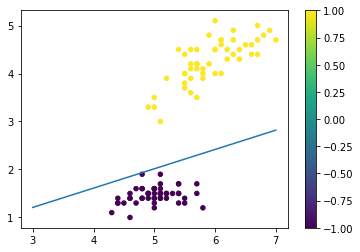

In [24]:
from sklearn.model_selection import train_test_split   #这里是引用了交叉验证 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=1)




from sklearn.linear_model import Perceptron
#定义感知机
clf = Perceptron(fit_intercept=False,n_iter=30,shuffle=False)
#使用训练数据进行训练
clf.fit(X_train,y_train)
#
print('得到训练结果，权重矩阵:')

print(clf.coef_)
#输出为：[[-0.38478876,4.41537463]]

#超平面的截距，此处输出为：[0.]
print('输出截距:')

print(clf.intercept_)
#利用测试数据进行验证
print('输出准确性：')
acc = clf.score(X_test,y_test)
print(acc)

acc = clf.score(X_train,y_train)
print(acc)
#得到的输出结果为0.995，这个结果还不错吧。


from matplotlib import pyplot as plt
#画出正例和反例的散点图
from matplotlib.colors import ListedColormap

#discrete color scheme
#cMap = ListedColormap(['white', 'green', 'blue'])

plt.scatter(x=X[:,0],y=X[:,1],c=y,edgecolors='face',s=20)
cbar = plt.colorbar()
#cbar.set_yticklabels(['1','2','3'])
#cbar.set_label('# of contacts', rotation=270)

#plt.scatter(positive_x1,positive_x2,c='red')
#plt.scatter(negetive_x1,negetive_2,c='blue')
#画出超平面（在本例中即是一条直线）
line_x = np.arange(3,8)
print(line_x)
print((-clf.coef_[0][0] / clf.coef_[0][1]))
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y)
plt.show()

X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

Text(0.5,1,'红色点标签为0,绿色点标签为1，待预测的点为蓝色')

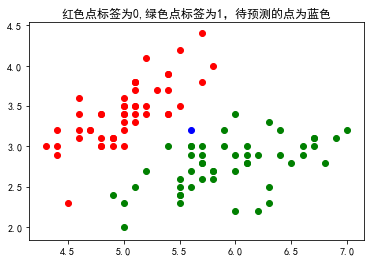

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
#准备数据集
iris=datasets.load_iris()
X=iris.data
print('X:\n',X)
Y=iris.target
print('Y:\n',Y)
 
#处理二分类问题，所以只针对Y=0,1的行，然后从这些行中取X的前两列
x=X[Y<2,:2]
print(x.shape)
print('x:\n',x)
y=Y[Y<2]
print('y:\n',y)
#target=0的点标红，target=1的点标蓝,点的横坐标为data的第一列，点的纵坐标为data的第二列
plt.scatter(x[y==0,0],x[y==0,1],color='red')
plt.scatter(x[y==1,0],x[y==1,1],color='green')
plt.scatter(5.6,3.2,color='blue')
x_1=np.array([5.6,3.2])
plt.title('红色点标签为0,绿色点标签为1，待预测的点为蓝色')


In [29]:

#采用欧式距离计算
distances=[np.sqrt(np.sum((x_t-x_1)**2)) for x_t in x]
#对数组进行排序，返回的是排序后的索引
d=np.sort(distances)
nearest=np.argsort(distances)
k=3
topk_y=[y[i] for i in nearest[:k]]
from collections import Counter
#对topk_y进行统计返回字典
votes=Counter(topk_y)
#返回票数最多的1类元素
print(votes)
predict_y=votes.most_common(1)[0][0]
print(predict_y)
plt.show()


Counter({1: 3})
1


In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
iris=datasets.load_iris()
x=iris.data
y=iris.target



#sklearn自带的train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
knn_classifier=KNeighborsClassifier(2)
knn_classifier.fit(x_train,y_train)
y_predict=knn_classifier.predict(x_test)
scores=knn_classifier.score(x_test,y_test)
print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)



acc:0.8947368421052632 0.8947368421052632
